In [46]:
using DrWatson; quickactivate("..")
using Gadfly

  Activating project at `~/workspace/Postdoc/UncertaintyModel`


In [45]:
include("../src/model.jl")

┌ Info: Precompiling Agents [46ada45e-f475-11e8-01d0-f70cc89e6671]
└ @ Base loading.jl:1423


select_parents

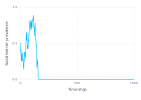

In [134]:
steps_per_round = 1

model = uncertainty_learning_model(;
    steps_per_round = steps_per_round, 
    env_uncertainty = 0.5, nteachers=5, low_payoff=0.8); 

adata = [(:behavior, countmap), (:social_learner, mean), 
         (:net_payoff, sum)]
mdata = [(:optimal_behavior), (:tick)]

adf, mdf = run!(model, agent_step!, model_step!, 1000; 
    adata = adata, mdata = mdata, 
    when = (model, step) -> 
        ( (step - 1) % steps_per_round == 0  ||  step == 0 ) );

plot(x=adf.step, y = adf.mean_social_learner, 
    Guide.xlabel("Time step"), 
    Guide.ylabel("Social learner prevalence"), 
    Geom.line, Theme(line_width=1.5pt))

## Analysis of experiment data

In [50]:
using JLD2
using DataFrames
using Statistics

In [51]:
include("../scripts/analysis.jl")

adf, mdf = load_results_df("../data/develop/env_uncertainty=[0.0,0.2,0.4,0.6,0.8,1.0]_high_payoff=[0.9]_low_payoff=[0.1,0.5,0.8]_nbehaviors=[2]_niter=1000_ntrials=20_steps_per_round=[1,2,4].jld2");


  Activating project at `~/workspace/Postdoc/UncertaintyModel`


In [52]:
res = innerjoin(adf, mdf, on = [:ensemble, :step]);

endtimesdf = filter(r -> (r.step == 999) && (r.low_payoff == 0.25), res);
# first(endtimesdf, 10)

groupbydf = groupby(res, [:env_uncertainty, :steps_per_round, :low_payoff]);

cdf = combine(groupbydf, :mean_social_learner => mean)
cdf.steps_per_round = string.(cdf.steps_per_round);
# mean(groupbydf[1].mean_social_learner)

PROJECT_THEME = Theme(
    point_size=3.5pt, major_label_font_size = 16pt, 
    minor_label_font_size = 14pt, key_title_font_size=14pt, 
    line_width = 2pt, key_label_font_size=14pt
)
# env_unc = 0.0:0.2:1.0
cdf.low_steps = map(string, zip(cdf.low_payoff, cdf.steps_per_round))
plot(cdf, x=:env_uncertainty, y=:mean_social_learner_mean, 
    color = :low_steps, Geom.line, Geom.point,
    Theme(line_width=1.5pt), Guide.xlabel("Env. var, u"), 
    Guide.ylabel("Social learning"), PROJECT_THEME)

In [1]:
include("../scripts/analysis.jl")

plot_soclearn_over_u_sigmoids(cdf; figure_dir="/Users/mt/workspace/Writing/UncMod/Figures")

  Activating project at `~/workspace/Postdoc/UncertaintyModel`
┌ Info: Precompiling Gadfly [c91e804a-d5a3-530f-b6f0-dfbca275c004]
└ @ Base loading.jl:1423
┌ Warning: The call to compilecache failed to create a usable precompiled cache file for Gadfly [c91e804a-d5a3-530f-b6f0-dfbca275c004]
│   exception = ErrorException("Required dependency StatsFuns [4c63d2b9-4356-54db-8cca-17b64c39e42c] failed to load from a cache file.")
└ @ Base loading.jl:1132


LoadError: UndefVarError: cdf not defined